In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-bookings-analysis/hotel_bookings.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/hotel-bookings-analysis/hotel_bookings.csv')

In [4]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [5]:
df.shape

(119390, 33)

In [6]:
df.columns

Index(['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [8]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
for col in df.describe(include ='object').columns:
    #print(col)
    print(df[col].unique())

['Resort Hotel' 'City Hotel']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN

In [10]:
df.drop(['agent','company'],axis=1, inplace=True)

In [11]:
df.isnull().sum()

index                               0
hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr         

In [12]:
#remove null values
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

<Axes: >

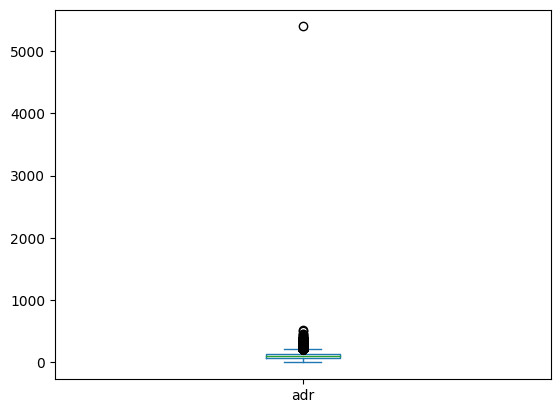

In [14]:
df['adr'].plot(kind='box')

In [15]:
#there is outlier so, we have to remove it
df= df[df['adr']<5000]

# Data Analysis and Visualization

In [16]:
#percentage of cancelled and not cancelled values
cancelled_perc = df['is_canceled'].value_counts(normalize =True)
cancelled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

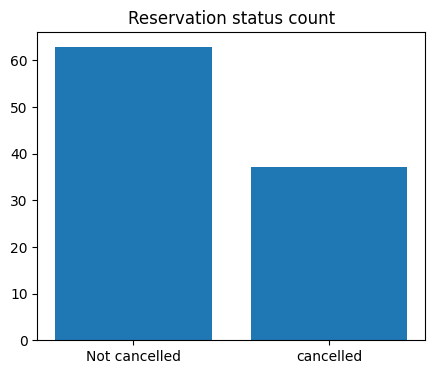

In [17]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not cancelled","cancelled"],df['is_canceled'].value_counts(normalize =True).mul(100))
plt.show()

the accompanying bar graph shows the percentage of reservations that are cancelled and those that are not. it is obvious that there are still significant number of reservations that have not been cancelled. there are still 37% of clients who cancelled their reservations, which has significant impact on the hotels earnings.

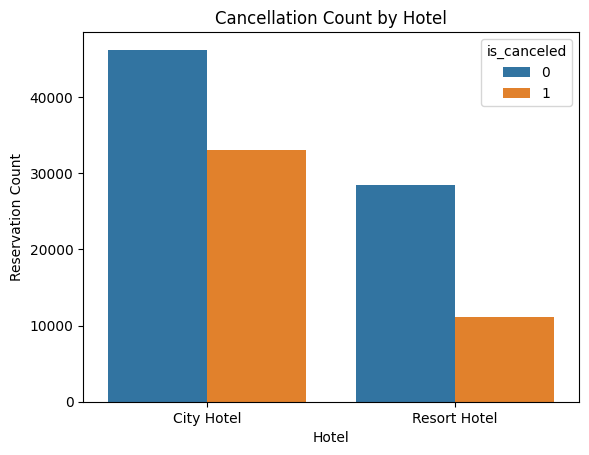

In [18]:
# Calculate the cancellation count for each hotel
cancellation_count = df.groupby('hotel')['is_canceled'].value_counts().reset_index(name='cancellation_count')

# Bar plot of cancellation count by hotel
sns.barplot(data=cancellation_count, x='hotel', y='cancellation_count', hue='is_canceled')
plt.title('Cancellation Count by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')
plt.show()

In [19]:
resort_hotel = df[df['hotel']=="Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [20]:
city_hotel = df[df['hotel']=="City Hotel"]
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

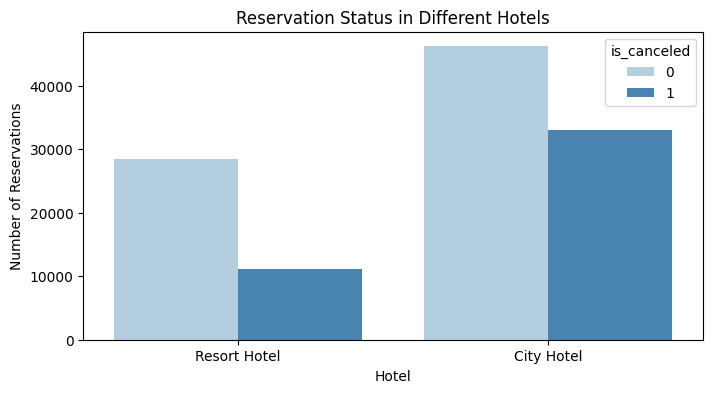

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='Blues')
plt.title('Reservation Status in Different Hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.show()

In comparison to resort hotels, city hotels have more bookings. it's possible that resort hotels are more expensive then those in cities.

In [22]:
resort_hotel =resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel =city_hotel.groupby('reservation_status_date')[['adr']].mean()

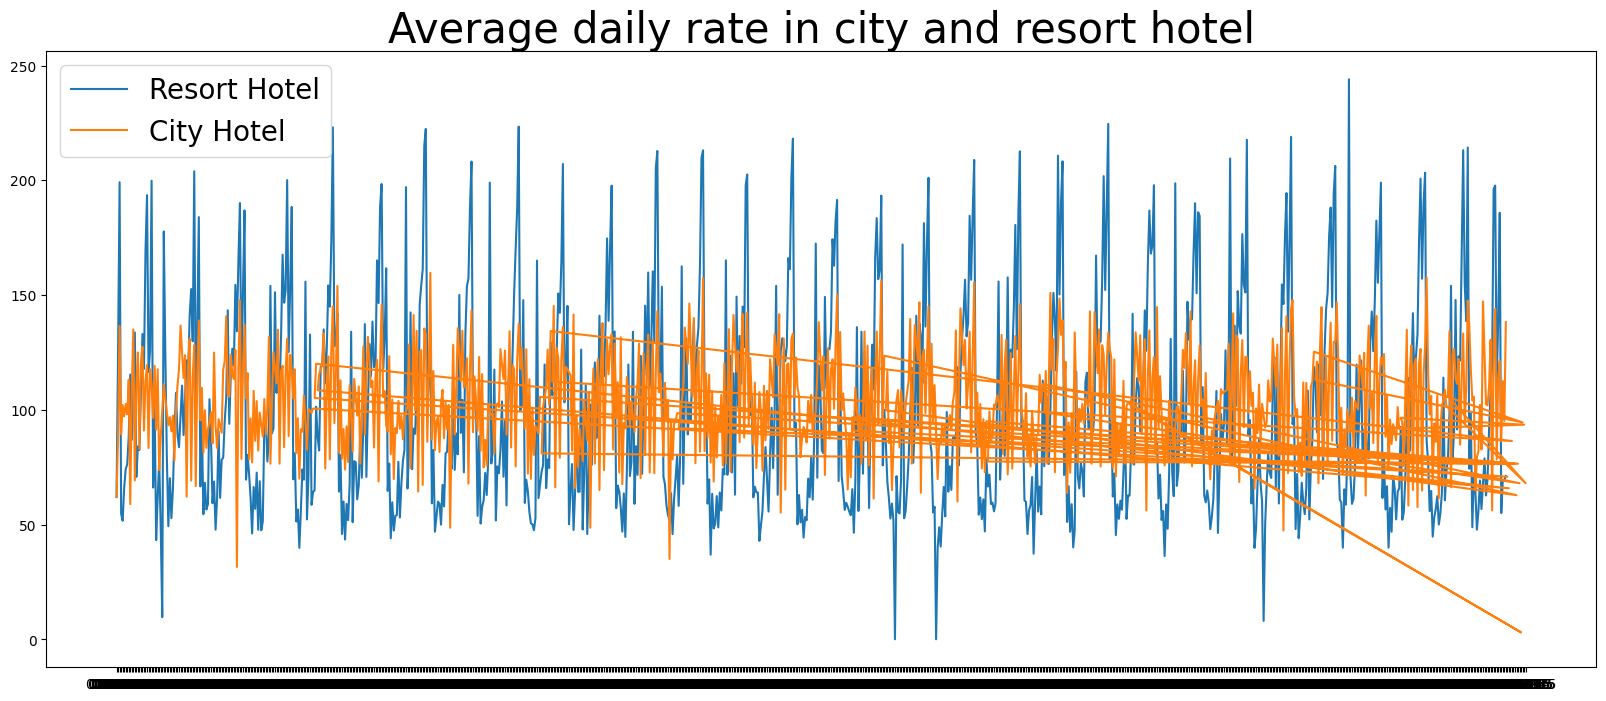

In [23]:
plt.figure(figsize=(20,8))
plt.title("Average daily rate in city and resort hotel", fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.show()

the line graph above shows that on certain days, the average daily rate for city hotel is less then that of a resort hotel, and on other days, it is even less. it goes without saying that weekends and holidays may see a rise in resort hotel rates.

/tmp/ipykernel_19/1978012023.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


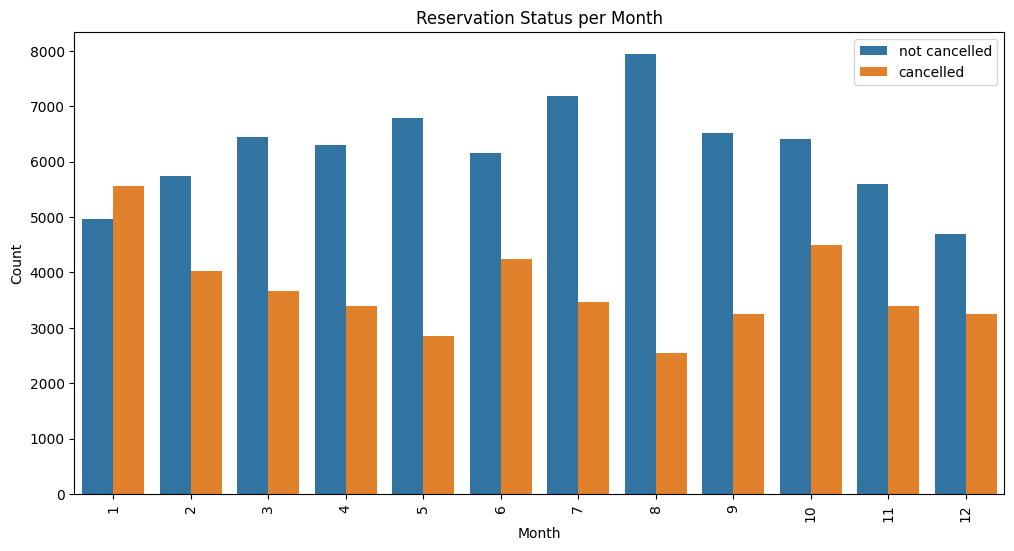

In [24]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', hue='is_canceled')
plt.title('Reservation Status per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(['not cancelled','cancelled'])
plt.xticks(rotation=90)
plt.show()

we have create the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status. as can be seen, both the number of confirmed reservations and the number of cancelled reservations are largest in the month of August whereas January is the month with the most cancelled reservations.

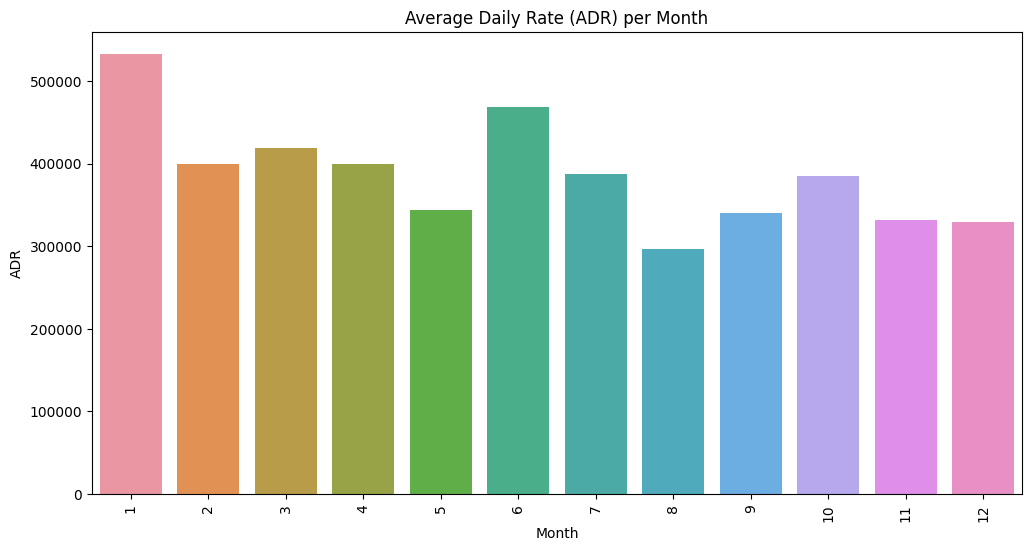

In [25]:
# Calculate average daily rate (ADR) per month
adr_per_month = df[df['is_canceled']==1].groupby('month')['adr'].sum().reset_index()

# Create a bar plot of ADR per month
plt.figure(figsize=(12, 6))
sns.barplot(data=adr_per_month, x='month', y='adr')
plt.title('Average Daily Rate (ADR) per Month')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.xticks(rotation=90)
plt.show()

This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the accommodation is solely responsible for the cancellation.

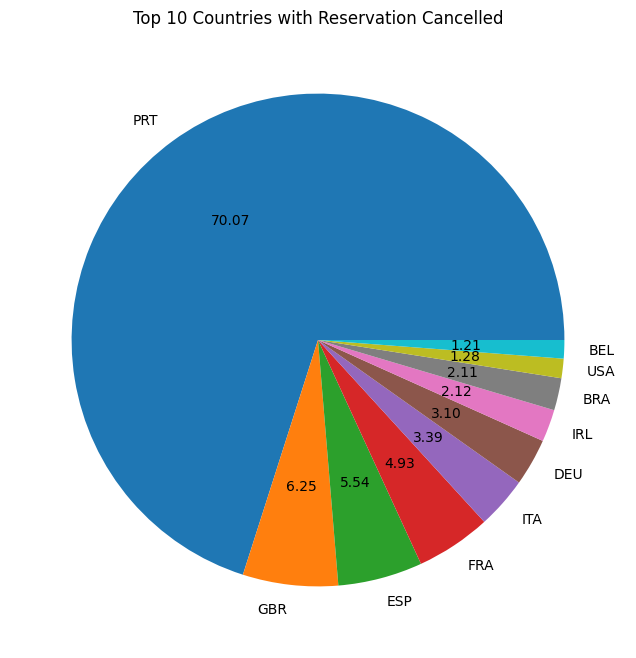

In [26]:
cancaled_data =df[df['is_canceled']==1]
top_10_countries=cancaled_data['country'].value_counts()[:10]
plt.figure(figsize=(8, 8))
plt.title('Top 10 Countries with Reservation Cancelled')
plt.pie(top_10_countries, autopct='%.2f',labels=top_10_countries.index)
plt.show()

Now, let's see which country has the highest reservation canceled. The top country is Portugal with the highest number of cancellations.

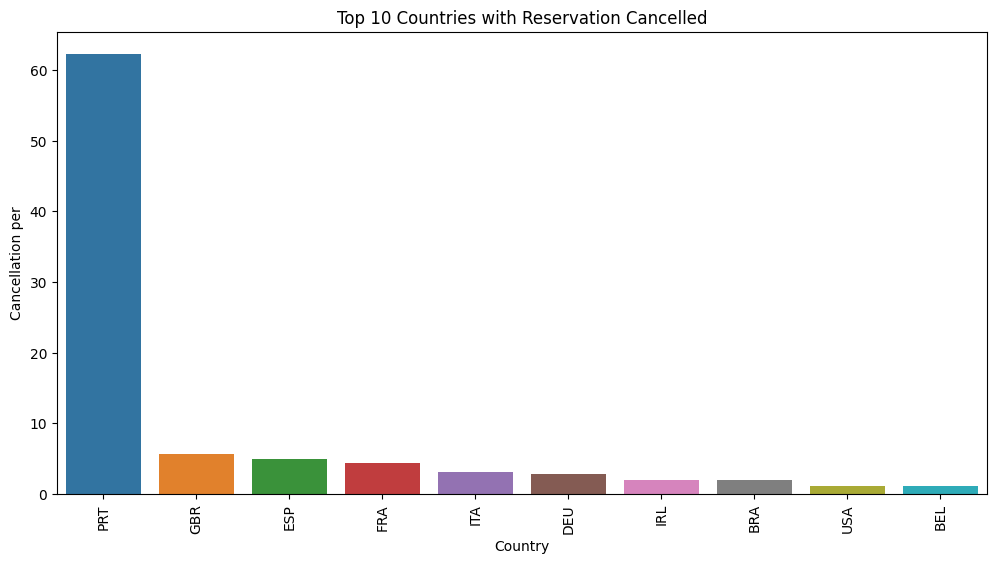

In [27]:
cancaled_data =df[df['is_canceled']==1]
top_10_countries=cancaled_data['country'].value_counts(normalize=True).mul(100)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Countries with Reservation Cancelled')
plt.xlabel('Country')
plt.ylabel('Cancellation per')
plt.xticks(rotation=90)
plt.show()

In [28]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [29]:
cancaled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

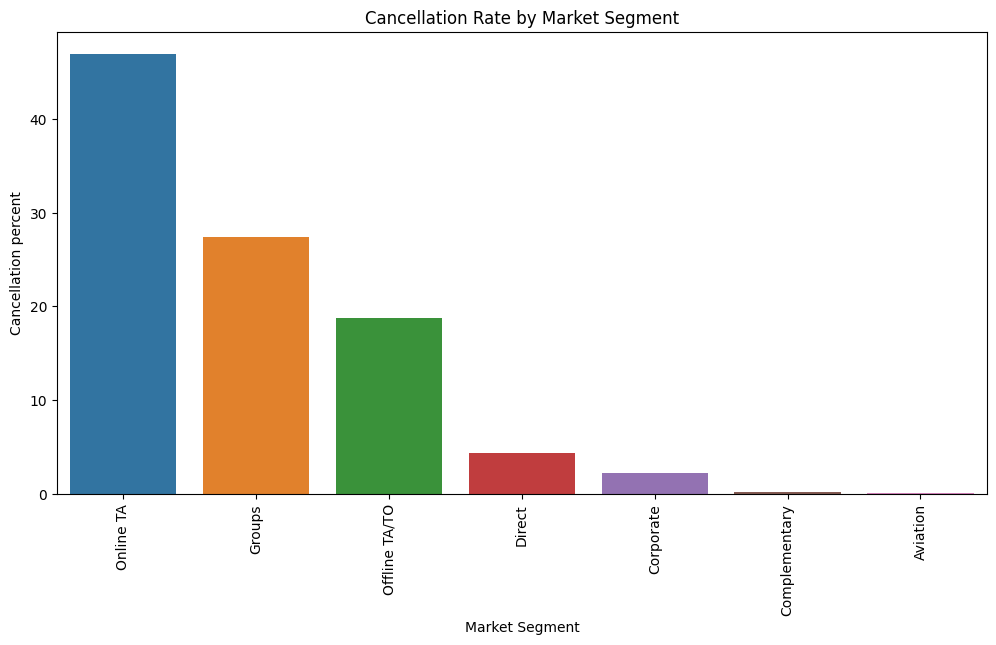

In [30]:
# Analyze cancellation rate by market segment
df_market_segment = cancaled_data['market_segment'].value_counts(normalize=True).mul(100)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_market_segment.index,  y=df_market_segment.values)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation percent')
plt.xticks(rotation=90)
plt.show()

Most cancellation are coming from Online Travel Agencies 46% and then followed by Groups which is 18%.

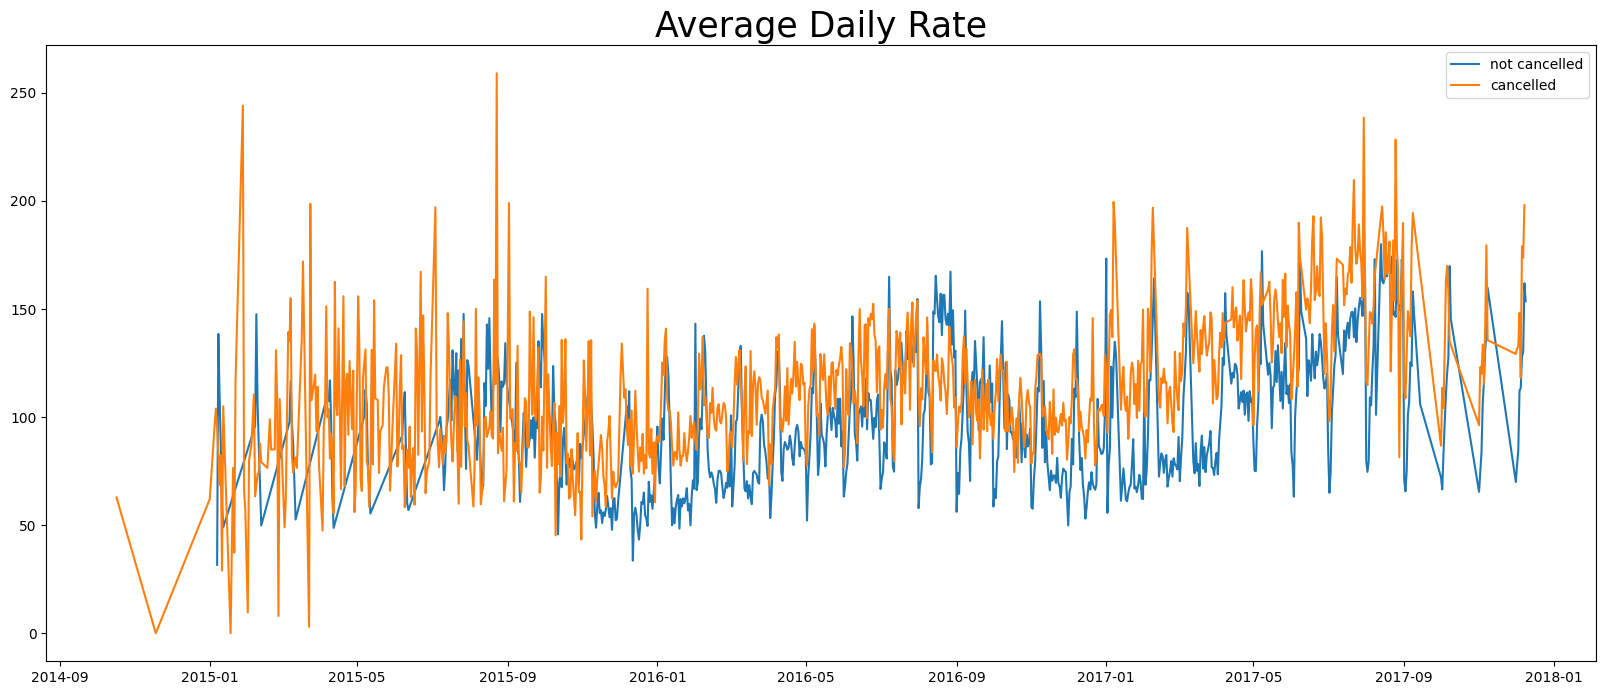

In [31]:
cancaled_df_adr = cancaled_data.groupby('reservation_status_date')[['adr']].mean()
cancaled_df_adr.reset_index(inplace=True)
cancaled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancaled_data =df[df['is_canceled'] ==0]
not_cancaled_df_adr = not_cancaled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancaled_df_adr.reset_index(inplace=True)
not_cancaled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate', fontsize=25)
plt.plot(not_cancaled_df_adr['reservation_status_date'], not_cancaled_df_adr['adr'], label='not cancelled')
plt.plot(cancaled_df_adr['reservation_status_date'], cancaled_df_adr['adr'], label='cancelled')
plt.legend()

In [32]:
cancaled_df_adr = cancaled_df_adr[(cancaled_df_adr['reservation_status_date']>'2016') & (cancaled_df_adr['reservation_status_date']<'2017-09')]
not_cancaled_df_adr = not_cancaled_df_adr[(not_cancaled_df_adr['reservation_status_date']>'2016') & (not_cancaled_df_adr['reservation_status_date']<'2017-09')]

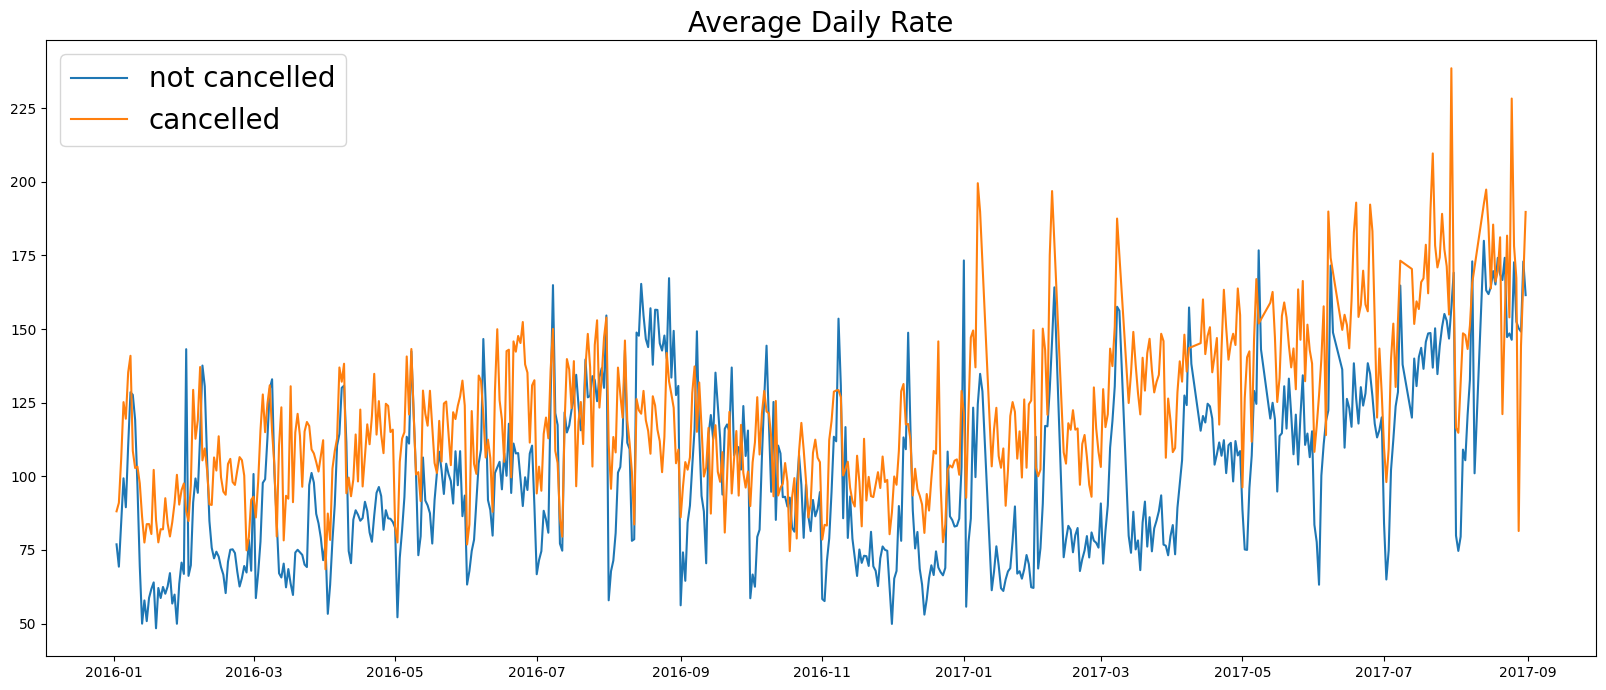

In [33]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate', fontsize=20)
plt.plot(not_cancaled_df_adr['reservation_status_date'], not_cancaled_df_adr['adr'], label='not cancelled')
plt.plot(cancaled_df_adr['reservation_status_date'], cancaled_df_adr['adr'], label='cancelled')
plt.legend(fontsize=20)

As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled. It clearly proves all the above analysis, that the higher price leads to higher cancellation.

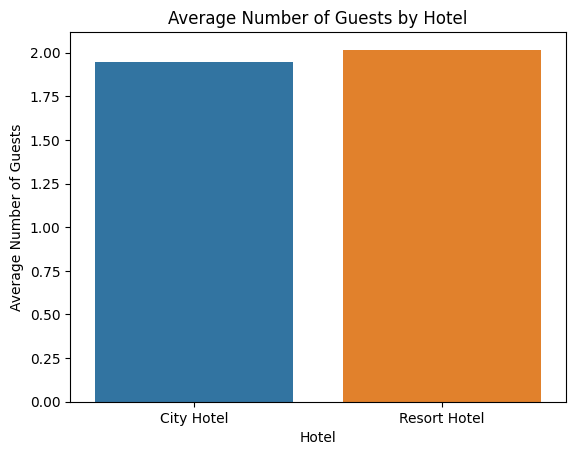

In [34]:
# Calculate average number of guests (adults, children, babies) per booking
df['total_guests'] = df['adults'] + df['children'] + df['babies']
average_guests = df.groupby('hotel')['total_guests'].mean().reset_index()
average_guests.columns = ['hotel', 'average_guests']

# Bar plot of average number of guests by hotel
sns.barplot(data=average_guests, x='hotel', y='average_guests')
plt.title('Average Number of Guests by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Average Number of Guests')
plt.show()

# Suggestion:

1.cancellation rates rise as the price does. in order to prevent cancellation of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. they can also provide some discounds to the consumers.

2.As the ratio of cancellation and not cancellation of the resort hotel is higher in the resort hotel then the city hotel. So, the hotels should provide a reasonable discount on room prices on weekends or on holidays.

3.In the month of january, the hotels can start campaigns or marketing with reasonable amount to increase their revenue as the cancellation is the highest in this month.

4.They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.